In [460]:
import re
import pandas as pd
def yearmonth(x):
    p = re.compile('.{7}')
    return p.findall(x)[0]

# 데이터 불러오기

## 각 데이터 불러오기

In [2]:
data20 = pd.read_csv('2020년_증식데이터_편집.csv', index_col=0)
data20['수주월'] = data20['수주일자'].apply(yearmonth)
data21 = pd.read_csv('2021년_증식데이터_편집.csv', index_col=0)
data21['수주월'] = data21['수주일자'].apply(yearmonth)

# 20년도 21년도 데이터 이어붙이기

data20_21 = pd.concat((data20,data21))
data20_21 = data20_21.sort_values(['수주일자','거래처코드','제품명'])

In [3]:
weather = pd.read_csv('전국평균날씨데이터.csv', index_col=0)
construction = pd.read_csv('연면적별.csv', index_col=0)
rate = pd.read_csv('월별 시장금리추이(202001_202112).csv',encoding='cp949',index_col=0).transpose().reset_index()

## 빈 날짜 DF 생성

In [4]:
# 빈 날짜 데이터프레임 생성
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2021-12-31')
date_all = pd.date_range(start=start,end=end,freq='d')
# test = pd.DataFrame(index=date_all).join(data20_21_detail)
# test[test['거래처코드'].isnull()]

In [5]:
date_all = pd.date_range(start, end, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True).set_index('Date')
date_all

""
Date
2020-01-01
2020-01-02
2020-01-03
2020-01-04
2020-01-05
...
2021-12-27
2021-12-28
2021-12-29


# 주 단위 데이터셋 생성

## 수주량

In [6]:
# 주 단위 수주량 합계 데이터셋
data20_21_total_week = data20_21.copy()
data20_21_total_week = data20_21_total_week.pivot_table('수주량',index=['수주일자'],aggfunc='sum')
data20_21_total_week = data20_21_total_week.reset_index()
data20_21_total_week['수주일자'] = pd.to_datetime(data20_21_total_week['수주일자'])
data20_21_total_week = data20_21_total_week.set_index('수주일자')

data20_21_total_week = data20_21_total_week.resample('w-tue').sum()
data20_21_total_week

,수주량
수주일자,
2020-01-07,1158600
2020-01-14,757000
2020-01-21,1464000
2020-01-28,1016800
2020-02-04,1392050
...,...
2021-12-07,1625070
2021-12-14,861000
2021-12-21,1405540


In [7]:
# 주 단위 (고객별,품목별) 수주량 합계 데이터셋

data20_21_detail_week = data20_21.copy()
data20_21_detail_week = data20_21_detail_week.pivot_table('수주량',index=['수주일자','거래처코드','제품명'], aggfunc='sum')
data20_21_detail_week = data20_21_detail_week.reset_index()
data20_21_detail_week['수주일자'] = pd.to_datetime(data20_21_detail_week['수주일자'])
data20_21_detail_week = data20_21_detail_week.set_index('수주일자')

# data20_21_detail_week = data20_21_detail_week.resample('w-tue').sum()
data20_21_detail_week[(data20_21_detail_week['거래처코드']==2004000)&(data20_21_detail_week['제품명']=="PEMA-PR1000")]

,거래처코드,제품명,수주량
수주일자,,,
2020-01-01,2004000,PEMA-PR1000,20000
2020-02-22,2004000,PEMA-PR1000,20000
2020-03-17,2004000,PEMA-PR1000,10000
2020-04-22,2004000,PEMA-PR1000,20000
2020-05-17,2004000,PEMA-PR1000,10000
2020-06-22,2004000,PEMA-PR1000,20000
2020-07-17,2004000,PEMA-PR1000,10000
2020-08-22,2004000,PEMA-PR1000,20000
2020-09-17,2004000,PEMA-PR1000,10000


In [8]:
li = []
for i in data20_21_detail_week['거래처코드'].unique():
    for j in data20_21_detail_week[data20_21_detail_week['거래처코드']==i]['제품명'].unique():
        data = data20_21_detail_week[(data20_21_detail_week['거래처코드']==i)&(data20_21_detail_week['제품명']==j)]
        data = date_all.join(data,how='outer')
        data = data.drop(['거래처코드','제품명'],axis=1).resample('w-tue').sum()
        data['거래처코드'] = i
        data['제품명'] = j
        data = data[['거래처코드','제품명','수주량']]
        li.append(data)

In [9]:
data20_21_detail_week = pd.concat(li)
data20_21_detail_week

,거래처코드,제품명,수주량
2020-01-07,2004000,PEMA-PR1000,20000.0
2020-01-14,2004000,PEMA-PR1000,0.0
2020-01-21,2004000,PEMA-PR1000,0.0
2020-01-28,2004000,PEMA-PR1000,0.0
2020-02-04,2004000,PEMA-PR1000,0.0
...,...,...,...
2021-12-07,2003900,PEMA-PR1000,0.0
2021-12-14,2003900,PEMA-PR1000,0.0
2021-12-21,2003900,PEMA-PR1000,0.0
2021-12-28,2003900,PEMA-PR1000,0.0


## 날씨

In [10]:
# 주 단위 날씨 데이터셋
weather_week = weather.copy()
weather_week['날짜'] = pd.to_datetime(weather_week['날짜'])
weather_week = weather_week.set_index('날짜')
weather_week = weather_week.resample('w-tue').mean()
weather_week

,평균온도,일강수량,상대습도,최심적설
날짜,,,,
2020-01-07,2.750075,7.034737,72.215940,0.024361
2020-01-14,1.852782,0.730226,65.505564,0.015038
2020-01-21,1.088120,0.128722,58.339699,0.032180
2020-01-28,5.323008,3.924361,75.362707,0.000000
2020-02-04,2.950827,0.304060,67.209474,0.009474
...,...,...,...,...
2021-12-07,3.703459,0.230526,64.266165,0.004662
2021-12-14,4.859850,0.099850,69.050677,0.000000
2021-12-21,3.082105,0.511128,66.748722,0.193985


## 착공면적

In [11]:
construction_week = construction.copy()
construction_week = construction_week.set_index('Month')
construction_week = construction_week.reset_index()
construction_week['Month'] = pd.to_datetime(construction_week['Month'])
construction_week = construction_week.set_index('Month')
construction_week = date_all.join(construction_week).fillna(method='ffill')
construction_week

,연면적별
Date,
2020-01-01,6200509.0
2020-01-02,6200509.0
2020-01-03,6200509.0
2020-01-04,6200509.0
2020-01-05,6200509.0
...,...
2021-12-27,14132721.0
2021-12-28,14132721.0
2021-12-29,14132721.0


In [12]:
def strftime(x):
    return x.strftime('%Y-%m')

In [13]:
construction_week = construction_week.reset_index()
construction_week['month'] = construction_week['Date'].apply(strftime)

In [14]:
li = []
for i in construction_week['month'].unique():
    li.extend((construction_week[construction_week['month']==i].loc[:,'연면적별']/len(construction_week[construction_week['month']==i])).values)

In [15]:
construction_week['연면적별'] = pd.Series(li)

In [16]:
pd.options.display.float_format = '{:.2f}'.format

In [17]:
construction_week = construction_week.set_index('Date').drop('month',axis=1).resample('w-tue').sum()


In [18]:
construction_week

,연면적별
Date,
2020-01-07,1400114.94
2020-01-14,1400114.94
2020-01-21,1400114.94
2020-01-28,1400114.94
2020-02-04,1668158.64
...,...
2021-12-07,3191259.58
2021-12-14,3191259.58
2021-12-21,3191259.58


## 금리

In [19]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2022-01-04')
date_gold = pd.date_range(start, end, freq='w-tue').to_frame().rename(columns={0:'Date'}).reset_index(drop=True).set_index('Date')
date_gold

""
Date
2020-01-07
2020-01-14
2020-01-21
2020-01-28
2020-02-04
...
2021-12-07
2021-12-14
2021-12-21


In [20]:
import numpy as np

In [21]:
rate_week = rate.copy().set_index('index')
rate_week = rate_week.reset_index()
rate_week['index'] = pd.to_datetime(rate_week['index'])
rate_week = rate_week.set_index('index')
rate_week = date_all.join(rate_week)
rate_week = rate_week.resample('w-tue').sum()
rate_week = rate_week.replace(0,np.NaN).fillna(method='ffill')
rate_week 

,기준금리
Date,
2020-01-07,1.25
2020-01-14,1.25
2020-01-21,1.25
2020-01-28,1.25
2020-02-04,1.25
...,...
2021-12-07,1.00
2021-12-14,1.00
2021-12-21,1.00


In [22]:
# 데이터셋 결합
dataset_detail_week = weather_week.join([rate_week,construction_week,data20_21_detail_week])

In [98]:
dataset_detail_week.to_csv('dataset_detail_week.csv')

In [457]:
dataset_detail_week= pd.read_csv('dataset_detail_week.csv', index_col=0)
dataset_detail_week

,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,거래처코드,제품명,수주량
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-PR1000,20000.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-HR1000,15000.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-SR2000,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-HR1500,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-SR2000A,0.00
...,...,...,...,...,...,...,...,...,...
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-PCR3000N,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-SR3000F,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,AE,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-580FX,15000.00


## 시멘트

In [ ]:
pd.date_range(start=start,end=end,freq='m')

In [458]:
add_mi = pd.read_csv('./시멘트2년 국내출하(월별증감율).csv')

In [459]:
add_mi

,월,월별,내수계,월별증감율
0,1,1월,2704,0.00
1,2,2월,3127,0.16
2,3,3월,4419,0.41
3,4,4월,4625,0.05
4,5,5월,4065,-0.12
5,6,6월,4289,0.06
6,7,7월,3541,-0.17
7,8,8월,3026,-0.15
8,9,9월,4069,0.34
9,10,10월,4347,0.07


In [111]:
dataset_detail_week['수주량']

2020-01-07   20000.00
2020-01-07   15000.00
2020-01-07       0.00
2020-01-07       0.00
2020-01-07       0.00
               ...   
2022-01-04       0.00
2022-01-04       0.00
2022-01-04       0.00
2022-01-04   15000.00
2022-01-04       0.00
Name: 수주량, Length: 66675, dtype: float64

In [100]:
ind=dataset_detail_week.index.unique()

In [101]:
pro=dataset_detail_week['제품명'].unique()

In [105]:
part_li = []
for i,j in enumerate(ind):
    dataset_detail_week.replace({j:i}, inplace=True)


In [106]:
dataset_detail_week

,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,거래처코드,제품명,수주량
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-PR1000,20000.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-HR1000,15000.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-SR2000,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-HR1500,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-SR2000A,0.00
...,...,...,...,...,...,...,...,...,...
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-PCR3000N,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-SR3000F,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,AE,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-580FX,15000.00


In [83]:
part_li2[10]

,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,거래처코드,제품명,수주량
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004100,CSA4000,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004500,CSA4000,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2005900,CSA4000,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2006000,CSA4000,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2006300,CSA4000,0.00
...,...,...,...,...,...,...,...,...,...
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003000,CSA4000,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003400,CSA4000,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003500,CSA4000,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003600,CSA4000,0.00


In [85]:
cus=dataset_detail_week['거래처코드'].unique()

In [86]:
part_li3 = []
for i in cus:
    part =dataset_detail_week[dataset_detail_week['거래처코드']==i]
    part_li3.append(part)

In [92]:
part_li3[7].head(10)

,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,거래처코드,제품명,수주량
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2005800,PEMA-HR1000,10000.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2005800,AE,10000.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2005800,CSA5000,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2005800,PEMA-HR1500,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2005800,PEMA-SR2000,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2005800,PEMA-580FX,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2005800,PEMA-PR1000,0.00
2020-01-14,1.85,0.73,65.51,0.02,1.25,1400114.94,2005800,PEMA-HR1000,0.00
2020-01-14,1.85,0.73,65.51,0.02,1.25,1400114.94,2005800,AE,4000.00
2020-01-14,1.85,0.73,65.51,0.02,1.25,1400114.94,2005800,CSA5000,0.00


# 월 단위 데이터셋 생성

## 수주량

In [ ]:
# 월 단위 수주량 합계 데이터셋
data20_21_total_month = data20_21.copy()
data20_21_total_month = data20_21_total_month.pivot_table('수주량',index=['수주월'], aggfunc='sum')
data20_21_total_month

,수주량
수주월,
2020-01,4808400
2020-02,6317320
2020-03,7712350
2020-04,7157310
2020-05,7712350
2020-06,5784210
2020-07,6645350
2020-08,6182310
2020-09,7566350


In [ ]:
# 월 단위 (거래처별, 품목별) 수주량  합계 데이터셋
data20_21_detail_month = data20_21.copy()
data20_21_detail_month = data20_21_detail_month.pivot_table('수주량',index=['수주월','거래처코드','제품명'], aggfunc='sum')
data20_21_detail_month = data20_21_detail_month.reset_index()
data20_21_detail_month = data20_21_detail_month.set_index('수주월')
data20_21_detail_month

,거래처코드,제품명,수주량
수주월,,,
2020-01,2001102,AE,3000
2020-01,2001102,CSA5000,23000
2020-01,2001102,PEMA-HR1000,7000
2020-01,2001102,PEMA-HR1500,4000
2020-01,2001102,PEMA-PR1000,20000
...,...,...,...
2021-12,2007800,PEMA-HR1000,10000
2021-12,2007800,PEMA-HR1500,30000
2021-12,2007800,PEMA-PCM2000,5000


## 날씨

In [ ]:
# 월 단위 날씨
weather_month = weather.copy()
weather_month['년월'] = weather_month['날짜'].apply(yearmonth)
# weather['날짜'] = pd.to_datetime(weather['날짜'])

weather_month = weather_month.pivot_table(['평균온도','일강수량','상대습도','최심적설'],index='년월',aggfunc='mean')
weather_month.head(3)

,상대습도,일강수량,최심적설,평균온도
년월,,,,
2020-01,68,3,0,3
2020-02,67,2,0,4
2020-03,61,1,0,8


## 착공면적

In [ ]:
construction_month = construction.copy()
construction_month = construction_month.set_index('Month')
construction_month.head(3)

,연면적별
Month,
2020-01,6200509
2020-02,7743793
2020-03,11972937


## 금리

In [ ]:
rate_month = rate.copy().set_index('index')
rate_month.head(3)

,기준금리
index,
2020-01,1
2020-02,1
2020-03,1


## 데이터셋

In [ ]:
dataset_total_month = weather_month.join([rate_month,construction_month,data20_21_total_month])
dataset_total_month

,상대습도,일강수량,최심적설,평균온도,기준금리,연면적별,수주량
년월,,,,,,,
2020-01,68,3,0,3,1,6200509,4808400
2020-02,67,2,0,4,1,7743793,6317320
2020-03,61,1,0,8,1,11972937,7712350
2020-04,56,1,0,11,1,10481354,7157310
2020-05,73,4,0,18,0,10999316,7712350
2020-06,76,6,0,23,0,10255271,5784210
2020-07,86,13,0,22,0,10658885,6645350
2020-08,85,13,0,27,0,8595586,6182310
2020-09,80,8,0,20,0,10775873,7566350


## 상세 데이터셋

In [ ]:
dataset_detail_month = weather_month.join([rate_month,construction_month,data20_21_detail_month])
dataset_detail_month

,상대습도,일강수량,최심적설,평균온도,기준금리,연면적별,거래처코드,제품명,수주량
2020-01,68,3,0,3,1,6200509,2001102,AE,3000
2020-01,68,3,0,3,1,6200509,2001102,CSA5000,23000
2020-01,68,3,0,3,1,6200509,2001102,PEMA-HR1000,7000
2020-01,68,3,0,3,1,6200509,2001102,PEMA-HR1500,4000
2020-01,68,3,0,3,1,6200509,2001102,PEMA-PR1000,20000
...,...,...,...,...,...,...,...,...,...
2021-12,65,0,0,2,1,14132721,2007800,PEMA-HR1000,10000
2021-12,65,0,0,2,1,14132721,2007800,PEMA-HR1500,30000
2021-12,65,0,0,2,1,14132721,2007800,PEMA-PCM2000,5000
2021-12,65,0,0,2,1,14132721,2007800,PEMA-SR2000,36000


In [ ]:
dataset_detail_month[(dataset_detail_month['거래처코드']==2001102)&(dataset_detail_month['제품명']=='AE')]

,상대습도,일강수량,최심적설,평균온도,기준금리,연면적별,거래처코드,제품명,수주량
2020-01,68,3,0,3,1,6200509,2001102,AE,3000
2020-03,61,1,0,8,1,11972937,2001102,AE,3000
2020-05,73,4,0,18,0,10999316,2001102,AE,3000
2020-07,86,13,0,22,0,10658885,2001102,AE,3000
2020-09,80,8,0,20,0,10775873,2001102,AE,3000
2020-11,66,1,0,9,0,12312253,2001102,AE,3000
2021-01,64,1,1,-1,0,7570978,2001102,AE,3000
2021-03,68,4,0,9,0,12996528,2001102,AE,3000
2021-05,71,4,0,17,0,12417941,2001102,AE,3000
2021-07,81,8,0,26,0,10510350,2001102,AE,3000


In [ ]:
for i in dataset_detail['거래처코드'].unique():
    for j in dataset_detail[dataset_detail['거래처코드']==i]['제품명'].unique():
        data = dataset_detail[(dataset_detail['거래처코드']==i)&(dataset_detail['제품명']==j)]

KeyError: '거래처코드'

In [ ]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=5, max_q=3,m=12,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

In [113]:
!pip install lazypredict

In [114]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [480]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df3 = pd.read_csv('./주차별합계.csv', index_col=0)
df3

,수주량,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,13수주량
1,1158600,10.30,2.20,65.20,0.00,0.75,2703566.42,1763550
2,757000,9.62,0.12,49.08,0.00,0.75,2445649.27,1926070
3,1464000,9.47,1.05,56.94,0.00,0.75,2445649.27,1636000
4,1016800,11.43,4.95,67.63,0.00,0.75,2445649.27,1984640
5,1392050,10.85,0.06,50.09,0.00,0.75,2445649.27,1610600
...,...,...,...,...,...,...,...,...
89,1545000,3.70,0.23,64.27,0.00,1.00,3191259.58,1625070
90,1629800,4.86,0.10,69.05,0.00,1.00,3191259.58,861000
91,1556550,3.08,0.51,66.75,0.19,1.00,3191259.58,1405540
92,2220500,-1.19,0.48,59.43,0.58,1.00,3191259.58,1286540


In [481]:


df3['수주량'] = np.log1p(df3['수주량'])
df3['13수주량'] = np.log1p(df3['13수주량'])               

In [482]:
df3

,수주량,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,13수주량
1,13.96,10.30,2.20,65.20,0.00,0.75,2703566.42,14.38
2,13.54,9.62,0.12,49.08,0.00,0.75,2445649.27,14.47
3,14.20,9.47,1.05,56.94,0.00,0.75,2445649.27,14.31
4,13.83,11.43,4.95,67.63,0.00,0.75,2445649.27,14.50
5,14.15,10.85,0.06,50.09,0.00,0.75,2445649.27,14.29
...,...,...,...,...,...,...,...,...
89,14.25,3.70,0.23,64.27,0.00,1.00,3191259.58,14.30
90,14.30,4.86,0.10,69.05,0.00,1.00,3191259.58,13.67
91,14.26,3.08,0.51,66.75,0.19,1.00,3191259.58,14.16
92,14.61,-1.19,0.48,59.43,0.58,1.00,3191259.58,14.07


In [483]:
df3.columns

Index(['수주량', '평균온도', '일강수량', '상대습도', '최심적설', '기준금리', '연면적별', '13수주량'], dtype='object')

In [488]:
df = pd.DataFrame(df3['연면적별'])

obj = MinMaxScaler()
df3['연면적별']=obj.fit_transform(df)

In [486]:
obj2 = StandardScaler()
df3[['평균온도', '일강수량', '상대습도', '최심적설']]= obj2.fit_transform(df3.drop(['13수주량','수주량','기준금리', '연면적별'], axis=1, inplace = False))

In [489]:
df3

,수주량,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,13수주량
1,13.96,-0.49,-0.32,-0.62,-0.30,0.75,0.73,14.38
2,13.54,-0.57,-0.65,-2.22,-0.30,0.75,0.59,14.47
3,14.20,-0.58,-0.50,-1.44,-0.30,0.75,0.59,14.31
4,13.83,-0.36,0.12,-0.38,-0.30,0.75,0.59,14.50
5,14.15,-0.42,-0.66,-2.12,-0.30,0.75,0.59,14.29
...,...,...,...,...,...,...,...,...
89,14.25,-1.25,-0.63,-0.71,-0.28,1.00,1.00,14.30
90,14.30,-1.12,-0.65,-0.24,-0.30,1.00,1.00,13.67
91,14.26,-1.33,-0.59,-0.47,0.65,1.00,1.00,14.16
92,14.61,-1.82,-0.59,-1.19,2.55,1.00,1.00,14.07


In [490]:
x_features = df3.drop(['13수주량','수주량'], axis=1, inplace=False)
y_target = df3['13수주량']

In [491]:
np.set_printoptions(precision=4, suppress=True)

In [492]:
# x_train = x_features[:-12]
# y_train = y_target[:-12]
# x_test=x_features[-12:]
# y_test=y_target[-12:]

In [493]:
lr_model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.12, random_state=156)

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_test)

print(lr_model.coef_)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test,pred)
rmse = np.sqrt(mse)

print(rmse)
print(mae)
print(r2)

[ 0.0307 -0.0212 -0.0657 -0.1209 -0.1968  0.0056]
0.3569546033760713
0.23747899136031578
0.08783193962933977


In [494]:
len(x_test)

12

In [495]:
pred

array([14.2126, 14.2263, 14.1496, 14.2922, 14.1786, 14.1674, 14.3171,
       14.4087, 14.1592, 14.2289, 13.9401, 14.1995])

In [496]:
def correlation(X, y):
    res = [np.abs(np.corrcoef(X[:,i], y)[1,0]) for i in range(5)]
    return res
 
def LRC(X, y):
    std = np.std(X, axis=0)
    std_X = X/std
    
    reg = LinearRegression().fit(X, y)
    coef_sum = np.sum(np.abs(reg.coef_))
    res = np.abs(reg.coef_)/coef_sum
    return res
 
def plot_importance(X, y, importance):
    temp1 = X.columns
    temp2 = importance(X, y)
    result = sorted(zip(temp1, temp2), key=lambda x:x[1])
    label = [x[0] for x in result]
    value = [x[1] for x in result]
    fig = plt.figure(figsize=(6,7))
    fig.set_facecolor('white')
    plt.barh(label, value, height=0.5)
    plt.show()
    print(temp2)

In [497]:
LRC(x_features,y_target)

array([0.0708, 0.0214, 0.1257, 0.1664, 0.3435, 0.2721])

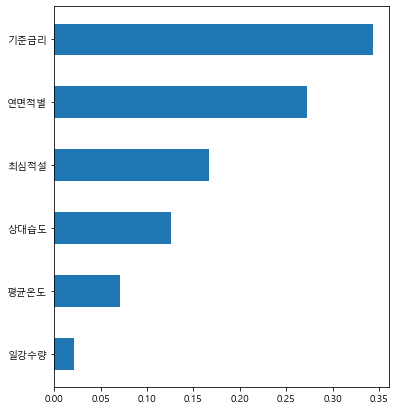

[0.0708 0.0214 0.1257 0.1664 0.3435 0.2721]


In [498]:
from matplotlib import font_manager, rc # 한글넣기

font_path = './malgun.ttf' # 해당파일 visualization > dataset에 있음
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력하게 해주는것

plot_importance(x_features,y_target,LRC)

In [499]:
clf = LazyRegressor(verbose=0, predictions=True)
# clf2 = LazyRegressor(verbose=0, predictions=True)

# models, predictions = clf2.fit(x_train, x_test, y_train, y_test)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:01<00:00, 38.54it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SGDRegressor,-0.87,0.15,0.34,0.01
TransformedTargetRegressor,-1.01,0.09,0.36,0.01
LinearRegression,-1.01,0.09,0.36,0.01
Lars,-1.01,0.09,0.36,0.01
Ridge,-1.01,0.09,0.36,0.01
PoissonRegressor,-1.01,0.09,0.36,0.01
RidgeCV,-1.01,0.08,0.36,0.01
BayesianRidge,-1.04,0.07,0.36,0.01
LinearSVR,-1.08,0.05,0.36,0.01


In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dataset_detail_week

,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,거래처코드,제품명,수주량
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-PR1000,20000.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-HR1000,15000.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-SR2000,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-HR1500,0.00
2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-SR2000A,0.00
...,...,...,...,...,...,...,...,...,...
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-PCR3000N,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-SR3000F,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,AE,0.00
2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003900,PEMA-580FX,15000.00


In [170]:
dic = {}
for i in dataset_detail_week['제품명'].unique():
    count=len(dataset_detail_week[dataset_detail_week['제품명']==i])
    dic.setdefault(i,count)


In [171]:
li=sorted(dic.items(), key=lambda x: x[1], reverse=True)

In [172]:
top_10=li[:10]

In [173]:
top_li = []
for i in top_10:
    top_li.append(i[0])

In [174]:
top_li

['PEMA-HR1000',
 'CSA5000',
 'PEMA-HR1500',
 'PEMA-SR2000',
 'PEMA-PR1000',
 'PEMA-SR3000F',
 'PEMA-580FX',
 'AE',
 'PEMA-SN400',
 'PEMA-PR2000']

In [206]:
pro1=dataset_detail_week[dataset_detail_week['제품명'] == 'PEMA-HR1000']

In [207]:
pro1.index.unique()

Index(['2020-01-07', '2020-01-14', '2020-01-21', '2020-01-28', '2020-02-04',
       '2020-02-11', '2020-02-18', '2020-02-25', '2020-03-03', '2020-03-10',
       ...
       '2021-11-02', '2021-11-09', '2021-11-16', '2021-11-23', '2021-11-30',
       '2021-12-07', '2021-12-14', '2021-12-21', '2021-12-28', '2022-01-04'],
      dtype='object', length=105)

In [208]:
pro1=pro1.reset_index()

In [209]:
pro1

,index,평균온도,일강수량,상대습도,최심적설,기준금리,연면적별,거래처코드,제품명,수주량
0,2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004000,PEMA-HR1000,15000.00
1,2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004100,PEMA-HR1000,15000.00
2,2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004104,PEMA-HR1000,10000.00
3,2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004200,PEMA-HR1000,0.00
4,2020-01-07,2.75,7.03,72.22,0.02,1.25,1400114.94,2004300,PEMA-HR1000,0.00
...,...,...,...,...,...,...,...,...,...,...
7450,2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003500,PEMA-HR1000,0.00
7451,2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003600,PEMA-HR1000,0.00
7452,2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003700,PEMA-HR1000,6000.00
7453,2022-01-04,-0.51,0.23,61.19,0.44,1.00,1367682.68,2003800,PEMA-HR1000,0.00


In [210]:
t=pro1.pivot_table(index='index',
                values = '수주량',
                aggfunc='sum')

In [211]:
features=pro1.pivot_table(index='index',
                values = ['평균온도','일강수량','상대습도','최심적설','기준금리','연면적별'],
                aggfunc='mean')

In [212]:
pro1_train_df = features.join(t)

In [213]:
pro1_train_df=pro1_train_df[12:].reset_index(drop=True)

In [214]:
pro1_train_df.index=pro1_train_df.index+1

In [215]:
pro1_train_df.rename({'수주량' : '13수주량'}, axis=1, inplace=True)

In [216]:
t.reset_index(drop=True, inplace=True)

In [217]:
t.index = t.index +1

In [218]:
t=t[:93]

In [219]:
PEMA_HR1000_df=pro1_train_df.join(t)

In [261]:
def top_list(pro_df):
    dic = {}
    for i in pro_df['제품명'].unique():
        count=len(pro_df[pro_df['제품명']==i])
        dic.setdefault(i,count)
    li=sorted(dic.items(), key=lambda x: x[1], reverse=True)
    top_li = []
    for i in li:
        top_li.append(i[0])
    return top_li

In [262]:
top_li = top_list(dataset_detail_week)
top_li

['PEMA-HR1000',
 'CSA5000',
 'PEMA-HR1500',
 'PEMA-SR2000',
 'PEMA-PR1000',
 'PEMA-SR3000F',
 'PEMA-580FX',
 'AE',
 'PEMA-SN400',
 'PEMA-PR2000',
 'PEMA-500FR',
 'CSA4000',
 'PEMA-PCM2000',
 'PEMA-PCM2000B',
 'PEMA-SR2000A',
 'PEMA-CR1000',
 'PEMA-PCR3000E',
 'PR1000',
 'PEMA-SR5000F',
 'PEMA-SP1000',
 'PEMA-CSA5000',
 'SRE-110',
 'PEMA-PCR3000N',
 'SRE-200',
 'PEMA-SPR',
 'PEMA-HR1000S',
 'ARE-580FX']

In [275]:
def make_product_df(pro_df):
    top_li = top_list(pro_df)
    
    df_li = []
    for i in top_li:
        df = pro_df[pro_df['제품명']==i]
        df=df.reset_index()
        t=df.pivot_table(index='index',
                    values = '수주량',
                    aggfunc='sum')
        features=df.pivot_table(index='index',
                    values = ['평균온도','일강수량','상대습도','최심적설','기준금리','연면적별'],
                    aggfunc='mean')
        new_df = features.join(t)
        new_df=new_df[12:].reset_index(drop=True)
        new_df.index=new_df.index+1
        new_df=new_df.rename({'수주량' : '13수주량'}, axis=1)
        t.reset_index(drop=True, inplace=True)
        t.index = t.index +1
        t=t[:93]
        product_df=new_df.join(t)
        df_li.append(product_df)
    return df_li, top_li

In [277]:
df_li,top_li=make_product_df(dataset_detail_week)

In [327]:
for i in top_li:
    print(f'{i}')
    print(df_dic[i])

PEMA-HR1000
    기준금리  상대습도  연면적별  일강수량  최심적설  평균온도     13수주량       수주량
1   0.75  0.73  0.73  2.20  0.00 10.30 634550.00 338000.00
2   0.75  0.59  0.59  0.12  0.00  9.62 687000.00 297000.00
3   0.75  0.59  0.59  1.05  0.00  9.47 528000.00 567000.00
4   0.75  0.59  0.59  4.95  0.00 11.43 623000.00 278000.00
5   0.75  0.59  0.59  0.06  0.00 10.85 563000.00 559050.00
..   ...   ...   ...   ...   ...   ...       ...       ...
89  1.00  1.00  1.00  0.23  0.00  3.70 578000.00 574000.00
90  1.00  1.00  1.00  0.10  0.00  4.86 294000.00 600000.00
91  1.00  1.00  1.00  0.51  0.19  3.08 466000.00 615550.00
92  1.00  1.00  1.00  0.48  0.58 -1.19 461000.00 778000.00
93  1.00  0.00  0.00  0.23  0.44 -0.51 252000.00 463000.00

[93 rows x 8 columns]
CSA5000
    기준금리  상대습도       연면적별  일강수량  최심적설  평균온도     13수주량       수주량
1   0.75 65.20 2703566.42  2.20  0.00 10.30 285000.00 133000.00
2   0.75 49.08 2445649.27  0.12  0.00  9.62 266000.00 131000.00
3   0.75 56.94 2445649.27  1.05  0.00  9.47 253000.00 219

In [281]:
df_dic = {}
for i,j in zip(top_li, df_li):
    df_dic.setdefault(i,j)

In [296]:
df_dic.keys()

dict_keys(['PEMA-HR1000', 'CSA5000', 'PEMA-HR1500', 'PEMA-SR2000', 'PEMA-PR1000', 'PEMA-SR3000F', 'PEMA-580FX', 'AE', 'PEMA-SN400', 'PEMA-PR2000', 'PEMA-500FR', 'CSA4000', 'PEMA-PCM2000', 'PEMA-PCM2000B', 'PEMA-SR2000A', 'PEMA-CR1000', 'PEMA-PCR3000E', 'PR1000', 'PEMA-SR5000F', 'PEMA-SP1000', 'PEMA-CSA5000', 'SRE-110', 'PEMA-PCR3000N', 'SRE-200', 'PEMA-SPR', 'PEMA-HR1000S', 'ARE-580FX'])

In [338]:
PEMA_HR1000_df = df_li[0]

In [339]:
df = pd.DataFrame(PEMA_HR1000_df['연면적별'])

obj = MinMaxScaler()
PEMA_HR1000_df['연면적별']=obj.fit_transform(df)

obj2 = MinMaxScaler()
PEMA_HR1000_df['상대습도']=obj2.fit_transform(df)

x_features = PEMA_HR1000_df.drop(['13수주량'], axis=1, inplace=False)
y_target = PEMA_HR1000_df['13수주량']

In [340]:
PEMA_HR1000_df

,기준금리,상대습도,연면적별,일강수량,최심적설,평균온도,13수주량,수주량
1,0.75,0.73,0.73,2.20,0.00,10.30,634550.00,338000.00
2,0.75,0.59,0.59,0.12,0.00,9.62,687000.00,297000.00
3,0.75,0.59,0.59,1.05,0.00,9.47,528000.00,567000.00
4,0.75,0.59,0.59,4.95,0.00,11.43,623000.00,278000.00
5,0.75,0.59,0.59,0.06,0.00,10.85,563000.00,559050.00
...,...,...,...,...,...,...,...,...
89,1.00,1.00,1.00,0.23,0.00,3.70,578000.00,574000.00
90,1.00,1.00,1.00,0.10,0.00,4.86,294000.00,600000.00
91,1.00,1.00,1.00,0.51,0.19,3.08,466000.00,615550.00
92,1.00,1.00,1.00,0.48,0.58,-1.19,461000.00,778000.00


In [344]:
lr_model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.12, random_state=156)

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_test)

print(lr_model.coef_)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test,pred)
rmse = np.sqrt(mse)

print(f'RMSE : {rmse}')
print(f'MAE : {mae}')
print(f'R2_score : {r2}')

[-9.33730816e+04  3.12519576e+03  3.12519576e+03 -3.82450495e+03
 -2.09566895e+05  3.93678432e+02 -2.45466263e-01]
RMSE : 174741.16645900815
MAE : 128919.41345357924
R2_score : 0.06968334663959475


In [342]:
len(y_test)

12

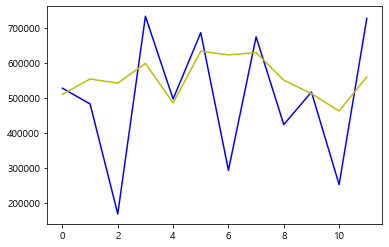

In [343]:
import matplotlib.pyplot as plt

x= range(len(pred))
y = pred



plt.plot(x,y_test, 'b')

plt.plot(x,y, 'y')

plt.show()

In [334]:


def correlation(X, y):
    res = [np.abs(np.corrcoef(X[:,i], y)[1,0]) for i in range(5)]
    return res
 
def LRC(X, y):
    std = np.std(X, axis=0)
    std_X = X/std
    
    reg = LinearRegression().fit(X, y)
    coef_sum = np.sum(np.abs(reg.coef_))
    res = np.abs(reg.coef_)/coef_sum
    return res
 
def plot_importance(X, y, importance):
    temp1 = X.columns
    temp2 = importance(X, y)
    result = sorted(zip(temp1, temp2), key=lambda x:x[1])
    label = [x[0] for x in result]
    value = [x[1] for x in result]
    fig = plt.figure(figsize=(6,7))
    fig.set_facecolor('white')
    plt.barh(label, value, height=0.5)
    plt.show()
    print(temp2)

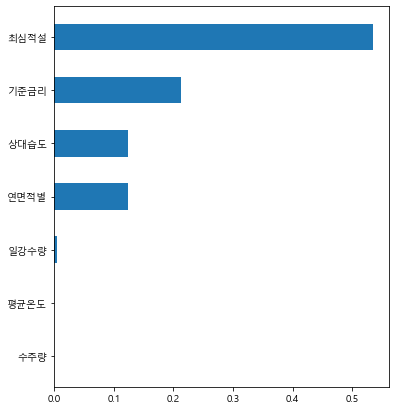

[2.13123743e-01 1.23685063e-01 1.23685062e-01 4.19719453e-03
 5.34837453e-01 4.71035773e-04 4.48819694e-07]


In [335]:
from matplotlib import font_manager, rc # 한글넣기

font_path = './malgun.ttf' # 해당파일 visualization > dataset에 있음
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력하게 해주는것

plot_importance(x_features,y_target,LRC)

In [336]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [345]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state=0)

clf = LazyRegressor(verbose=0, predictions=True)
# clf2 = LazyRegressor(verbose=0, predictions=True)

# models, predictions = clf2.fit(x_train, x_test, y_train, y_test)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:01<00:00, 38.43it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.12,0.35,136972.74,0.03
AdaBoostRegressor,0.09,0.33,139338.26,0.06
SGDRegressor,-0.04,0.23,149111.12,0.01
Ridge,-0.04,0.23,149191.79,0.01
Lars,-0.04,0.23,149198.60,0.01
TransformedTargetRegressor,-0.04,0.23,149198.60,0.01
LinearRegression,-0.04,0.23,149198.60,0.01
Lasso,-0.04,0.23,149199.81,0.01
LassoLars,-0.04,0.23,149208.43,0.01
